

1.   
2.   List item



In [ ]:
path = '/content/drive/MyDrive/workspace/ML/EnrornProject/'

In [ ]:
cd $path

/content/drive/MyDrive/workspace/ML/EnrornProject


In [ ]:
pwd

'/content/drive/MyDrive/workspace/ML/EnrornProject'

In [ ]:
import setup
import importlib
importlib.reload(setup)

<module 'setup' from '/content/drive/MyDrive/workspace/ML/EnrornProject/setup.py'>

In [ ]:
df = setup.GetDataframe('data/emails.csv')

In [ ]:
df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [ ]:
df.shape

(517401, 2)

Let's check the structure of emails

In [ ]:
print(df['message'][100])

Message-ID: <15940494.1075855689309.JavaMail.evans@thyme>
Date: Wed, 16 Aug 2000 05:35:00 -0700 (PDT)
From: phillip.allen@enron.com
To: cooper.richey@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Cooper Richey
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail
X-Origin: Allen-P
X-FileName: pallen.nsf

I tried the new address but I don't have access.  also, what do I need to 
enter under domain?


In [ ]:
def Getmails(message):
  strs = message.split("\n")
  msg = " ".join([s for s in strs if ":" not in s])
  getpair = lambda m: m.split(':', 1)
  dic = {}
  for ab,cd in [getpair(s) for s in strs if ':' in s]:
    if ab not in dic:
      dic[ab] = cd.strip()
  dic['text'] = msg + dic['Subject']
  def getAt(key):
    if key not in dic:
      return 'null'
    return dic[key]
  return getAt
  

In [ ]:
df['From'] = df['message'].apply(lambda x: Getmails(x)('From'))

In [ ]:
df['To'] = df['message'].apply(lambda x: Getmails(x)('To'))

In [ ]:
df['text'] = df['message'].apply(lambda x: Getmails(x)('text'))

In [ ]:
df.head()

,file,message,From,To,text
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,phillip.allen@enron.com,tim.belden@enron.com,Here is our forecast
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,phillip.allen@enron.com,john.lavorato@enron.com,Traveling to have a business meeting takes th...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,phillip.allen@enron.com,leah.arsdall@enron.com,test successful. way to go!!!Re: test
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,phillip.allen@enron.com,randall.gay@enron.com,"Randy, Can you send me a schedule of the sa..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello


In [ ]:
df = df.drop(columns=['message'])
df.head()

,file,From,To,text
0,allen-p/_sent_mail/1.,phillip.allen@enron.com,tim.belden@enron.com,Here is our forecast
1,allen-p/_sent_mail/10.,phillip.allen@enron.com,john.lavorato@enron.com,Traveling to have a business meeting takes th...
2,allen-p/_sent_mail/100.,phillip.allen@enron.com,leah.arsdall@enron.com,test successful. way to go!!!Re: test
3,allen-p/_sent_mail/1000.,phillip.allen@enron.com,randall.gay@enron.com,"Randy, Can you send me a schedule of the sa..."
4,allen-p/_sent_mail/1001.,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello


In [ ]:
from gensim.parsing.preprocessing import preprocess_string, preprocess_documents 
import numpy as np 

we need to create a function to parse the mails

In [ ]:
import email

# financial data

In [ ]:
import pickle
import pandas as pd
import numpy as np

In [ ]:
path = "/content/drive/MyDrive/workspace/ML/EnrornProject/"

In [ ]:
def fixData(path, newfilepath):
  content = ''
  outsize = 0
  with open(path, 'rb') as infile:
    content = infile.read()

  with open(newfilepath, 'wb') as output:
    for line in content.splitlines():
      outsize += len(line) + 1
      output.write(line + str.encode('\n'))
  
fixData(f'{path}data/financial_data.pkl', f'{path}data/poi_data.pkl')


In [ ]:
def load_financialData(path):
  data_dict = pickle.load(open(path, "rb"))
  df = pd.DataFrame.from_dict(data_dict, orient='index')
  df = df.replace('NaN', np.nan)
  return df

In [ ]:
fn_df = load_financialData(f'{path}data/poi_data.pkl')

In [ ]:
fn_df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788.0,807.0,NaN,1061827.0,NaN,600000.0,mark.metts@enron.com,NaN,NaN,585062.0,94299.0,38.0,NaN,29.0,1740.0,1.0,False,NaN,702.0,585062.0,NaN
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,NaN,1200000.0,NaN,NaN,-1386055.0,10623258.0,11200.0,NaN,6680544.0,NaN,2660303.0,NaN,False,1586055.0,NaN,3942714.0,NaN
ELLIOTT STEVEN,170941.0,NaN,NaN,211725.0,NaN,350000.0,steven.elliott@enron.com,NaN,-400729.0,6678735.0,78552.0,NaN,4890344.0,NaN,12961.0,NaN,False,NaN,NaN,1788391.0,NaN
CORDES WILLIAM R,NaN,764.0,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185.0,NaN,10.0,651850.0,12.0,NaN,0.0,False,NaN,58.0,386335.0,NaN
HANNON KEVIN P,243293.0,1045.0,NaN,288682.0,NaN,1500000.0,kevin.hannon@enron.com,NaN,-3117011.0,6391065.0,34039.0,32.0,5538001.0,32.0,11350.0,21.0,True,1617011.0,1035.0,853064.0,NaN


In [ ]:
fn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, METTS MARK to GLISAN JR BEN F
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   salary                     95 non-null     float64
 1   to_messages                86 non-null     float64
 2   deferral_payments          39 non-null     float64
 3   total_payments             125 non-null    float64
 4   loan_advances              4 non-null      float64
 5   bonus                      82 non-null     float64
 6   email_address              111 non-null    object 
 7   restricted_stock_deferred  18 non-null     float64
 8   deferred_income            49 non-null     float64
 9   total_stock_value          126 non-null    float64
 10  expenses                   95 non-null     float64
 11  from_poi_to_this_person    86 non-null     float64
 12  exercised_stock_options    102 non-null    float64
 13  from_messages              86 non-

# **Exploratory Data Analysis**

In [ ]:
import seaborn as sns

## Categorical Column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


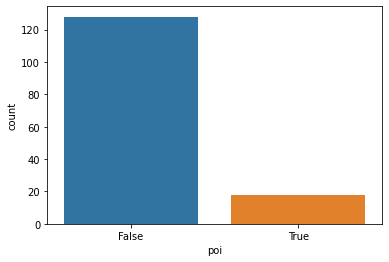

In [ ]:
sns.countplot(fn_df['poi'],legend='auto')


## Numerical Column 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


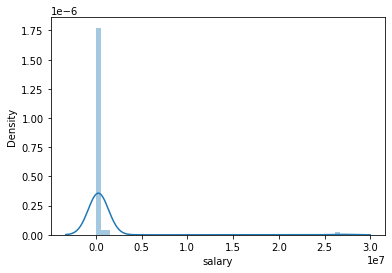

In [ ]:
sns.distplot(fn_df['salary'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


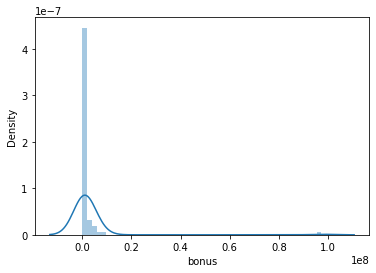

In [ ]:
sns.distplot(fn_df['bonus'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


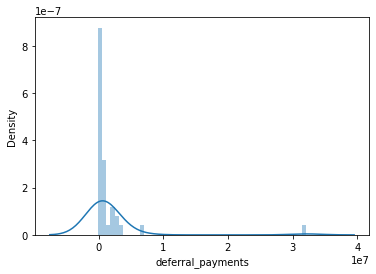

In [ ]:
sns.distplot(fn_df['deferral_payments'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


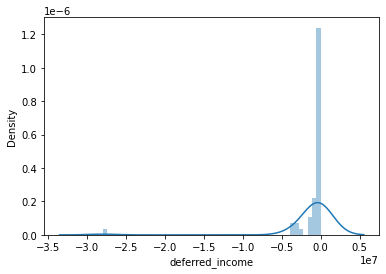

In [ ]:
sns.distplot(fn_df['deferred_income'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


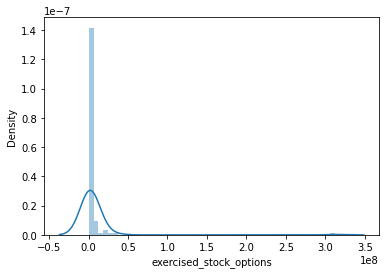

In [ ]:
sns.distplot(fn_df['exercised_stock_options'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


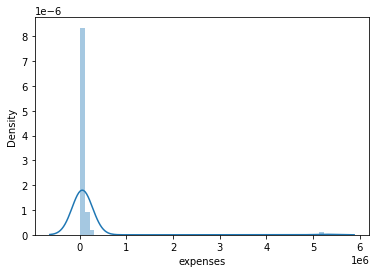

In [ ]:
sns.distplot(fn_df['expenses'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


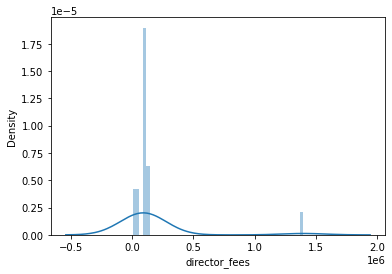

In [ ]:
sns.distplot(fn_df['director_fees'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


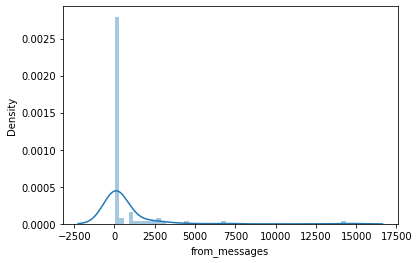

In [ ]:
sns.distplot(fn_df['from_messages'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


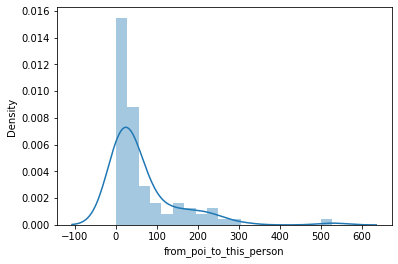

In [ ]:
sns.distplot(fn_df['from_poi_to_this_person'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


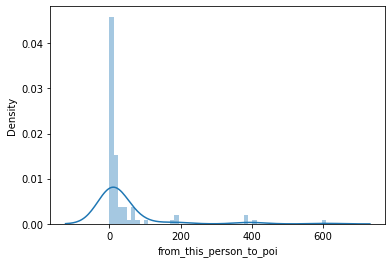

In [ ]:
sns.distplot(fn_df['from_this_person_to_poi'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


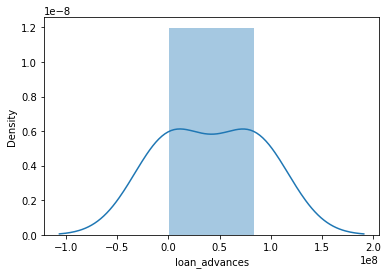

In [ ]:
sns.distplot(fn_df['loan_advances'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


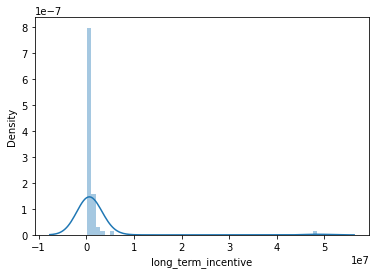

In [ ]:
sns.distplot(fn_df['long_term_incentive'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


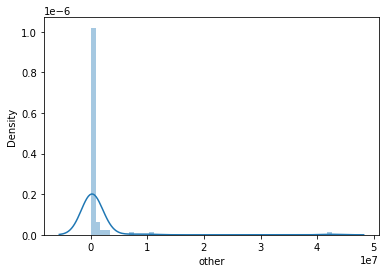

In [ ]:
sns.distplot(fn_df['other'])

##  Apply log transformation to the attributes to normalize the numerical  attributes               
## (To make the data more cleaner)

In [ ]:
import numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


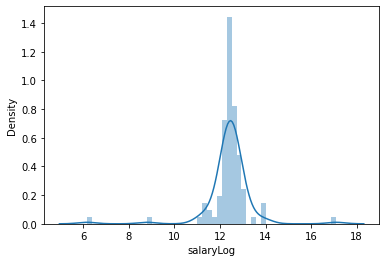

In [ ]:
df['salaryLog'] = np.log(fn_df['salary'])
sns.distplot(df['salaryLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


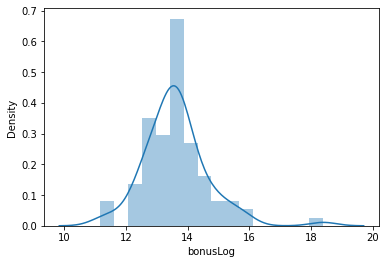

In [ ]:
df['bonusLog'] = np.log(fn_df['bonus'])
sns.distplot(df['bonusLog'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


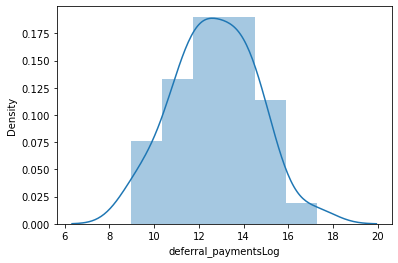

In [ ]:
df['deferral_paymentsLog'] = np.log(fn_df['deferral_payments'])
sns.distplot(df['deferral_paymentsLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


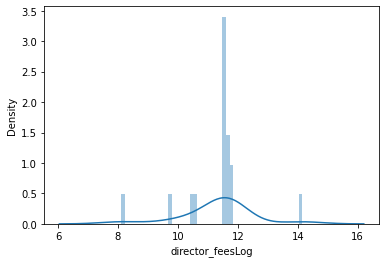

In [ ]:
df['director_feesLog'] = np.log(fn_df['director_fees'])
sns.distplot(df['director_feesLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


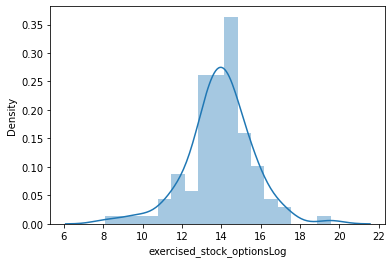

In [ ]:
df['exercised_stock_optionsLog'] = np.log(fn_df['exercised_stock_options'])
sns.distplot(df['exercised_stock_optionsLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


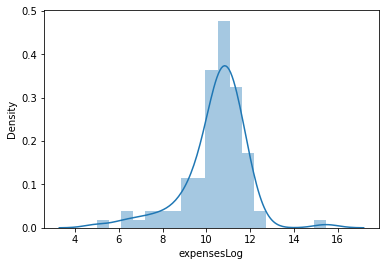

In [ ]:
df['expensesLog'] = np.log(fn_df['expenses'])
sns.distplot(df['expensesLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


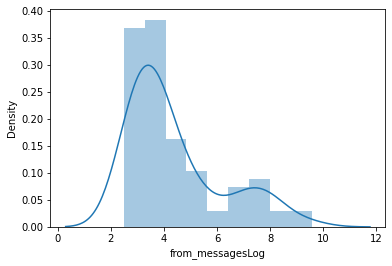

In [ ]:
df['from_messagesLog'] = np.log(fn_df['from_messages'])
sns.distplot(df['from_messagesLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


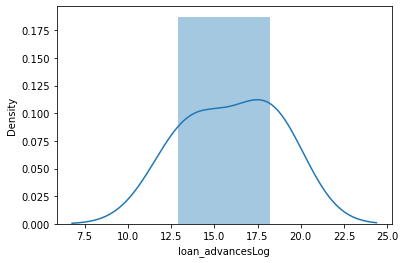

In [ ]:
df['loan_advancesLog'] = np.log(fn_df['loan_advances'])
sns.distplot(df['loan_advancesLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


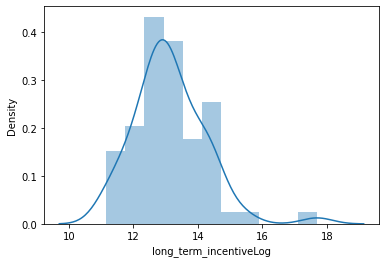

In [ ]:
df['long_term_incentiveLog'] = np.log(fn_df['long_term_incentive'])
sns.distplot(df['long_term_incentiveLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


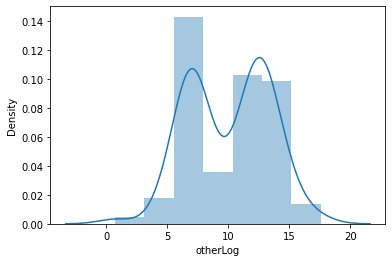

In [ ]:
df['otherLog'] = np.log(fn_df['other'])
sns.distplot(df['otherLog'])


## Correlation Matrix

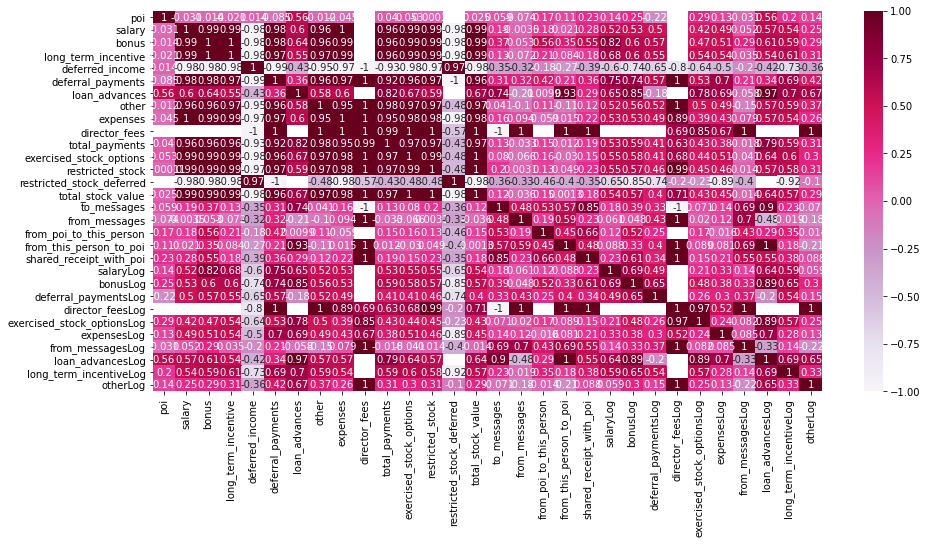

In [ ]:
corr = fn_df.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr ,annot=True,cmap="PuRd")

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
payment_data = ['salary',
                'bonus',
                'long_term_incentive',
                'deferred_income',
                'deferral_payments',
                'loan_advances',
                'other',
                'expenses',                
                'director_fees', 
                'total_payments']

stock_data = ['exercised_stock_options',
              'restricted_stock',
              'restricted_stock_deferred',
              'total_stock_value']

email_data = ['to_messages',
              'from_messages',
              'from_poi_to_this_person',
              'from_this_person_to_poi',
              'shared_receipt_with_poi']

              

In [ ]:
imp_med = SimpleImputer(missing_values=np.nan, strategy='median')
fn_df.loc[:, payment_data] = imp_med.fit_transform(fn_df.loc[:, payment_data])
fn_df.loc[:, stock_data] = imp_med.fit_transform(fn_df.loc[:, stock_data])

In [ ]:
fn_df.loc[:, email_data] = imp.fit_transform(fn_df.loc[:,email_data])

In [ ]:
fn_df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788.0,807.000000,227449.0,1061827.0,41762500.0,600000.0,mark.metts@enron.com,-146975.0,-159792.0,585062.0,94299.0,38.000000,1310813.5,29.000000,1740.0,1.000000,False,442035.0,702.000000,585062.0,108579.0
BAXTER JOHN C,267102.0,2073.860465,1295738.0,5634343.0,41762500.0,1200000.0,NaN,-146975.0,-1386055.0,10623258.0,11200.0,64.895349,6680544.0,608.790698,2660303.0,41.232558,False,1586055.0,1176.465116,3942714.0,108579.0
ELLIOTT STEVEN,170941.0,2073.860465,227449.0,211725.0,41762500.0,350000.0,steven.elliott@enron.com,-146975.0,-400729.0,6678735.0,78552.0,64.895349,4890344.0,608.790698,12961.0,41.232558,False,442035.0,1176.465116,1788391.0,108579.0
CORDES WILLIAM R,259996.0,764.000000,227449.0,1101393.0,41762500.0,769375.0,bill.cordes@enron.com,-146975.0,-159792.0,1038185.0,46950.0,10.000000,651850.0,12.000000,52382.0,0.000000,False,442035.0,58.000000,386335.0,108579.0
HANNON KEVIN P,243293.0,1045.000000,227449.0,288682.0,41762500.0,1500000.0,kevin.hannon@enron.com,-146975.0,-3117011.0,6391065.0,34039.0,32.000000,5538001.0,32.000000,11350.0,21.000000,True,1617011.0,1035.000000,853064.0,108579.0


In [ ]:
poi = fn_df.loc[fn_df['poi'] == True, ['email_address', 'poi']]

In [ ]:
poi

,email_address,poi
HANNON KEVIN P,kevin.hannon@enron.com,True
COLWELL WESLEY,wes.colwell@enron.com,True
RIEKER PAULA H,paula.rieker@enron.com,True
KOPPER MICHAEL J,michael.kopper@enron.com,True
SHELBY REX,rex.shelby@enron.com,True
DELAINEY DAVID W,david.delainey@enron.com,True
LAY KENNETH L,kenneth.lay@enron.com,True
BOWEN JR RAYMOND M,raymond.bowen@enron.com,True
BELDEN TIMOTHY N,tim.belden@enron.com,True
FASTOW ANDREW S,andrew.fastow@enron.com,True


In [ ]:
mail_list = list(fn_df['email_address'])
mail_list = [mail for mail in mail_list if type(mail) != float]
mail_list

['mark.metts@enron.com',
 'steven.elliott@enron.com',
 'bill.cordes@enron.com',
 'kevin.hannon@enron.com',
 'kristina.mordaunt@enron.com',
 'rockford.meyer@enron.com',
 'jeffrey.mcmahon@enron.com',
 'mark.haedicke@enron.com',
 'greg.piper@enron.com',
 'gene.humphrey@enron.com',
 'jeremy.blachman@enron.com',
 'marty.sunde@enron.com',
 'dana.gibbs@enron.com',
 'wes.colwell@enron.com',
 's..muller@enron.com',
 'charlene.jackson@enron.com',
 'dick.westfahl@enron.com',
 'rob.walls@enron.com',
 'louise.kitchen@enron.com',
 'jeffrey.shankman@enron.com',
 'john.wodraska@enron.com',
 'rick.bergsieker@enron.com',
 'philippe.bibi@enron.com',
 'paula.rieker@enron.com',
 'sally.beck@enron.com',
 'david.haug@enron.com',
 'john.echols@enron.com',
 'gary.hickerson@enron.com',
 'richard.lewis@enron.com',
 'robert.hayes@enron.com',
 'michael.kopper@enron.com',
 'dan.leff@enron.com',
 'john.lavorato@enron.com',
 'david.berberian@enron.com',
 'timothy.detmering@enron.com',
 'ken.powers@enron.com',
 'joe.g

In [ ]:
poi_ls = list(poi['email_address'])

In [ ]:
Toemp, Fromemp = {mail:[] for mail in mail_list}, {mail: [] for mail in mail_list}
for index, row in df.iterrows():
  if row['From'] in mail_list:
    Fromemp[row['From']].append(row['text'])
  if row['To'] in mail_list:
    Toemp[row['To']].append(row['text'])
  



In [ ]:
import gensim


In [ ]:
from gensim.parsing.preprocessing import *
CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, strip_punctuation, remove_stopwords]

In [ ]:
# from gensim.parsing.preprocessing import preprocess_string, preprocess_documents 
# class MyCorpus:
#       """An iterator that yields sentences (lists of str)."""
#       def __init__(self, toemp, fromemp):
#         self.toemp = toemp
#         self.fromemp = fromemp
#       def __iter__(self):
#         for emp in self.toemp:
#           for sentence in self.toemp[emp]:
#             yield preprocess_string(sentence.lower())
#         for emp in self.fromemp:
#           for sentence in self.fromemp[emp]:
#             yield preprocess_string(sentence.lower())

In [ ]:
from gensim.parsing.preprocessing import preprocess_string, preprocess_documents
preprocess_string('hello one of all')

['hello']

In [ ]:
# sentences = MyCorpus(Toemp, Fromemp)

In [ ]:
# skipmodel = gensim.models.Word2Vec(sentences=sentences, sg=1, min_count = 1, size=300, window=5, workers=2)

In [ ]:
pwd

In [ ]:

# word_vectors = skipmodel.wv
# word_vectors.save("word2vec.wordvectors")

In [ ]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')


In [ ]:
def getMailTovec(email):
  if type(email) == float:
    return np.zeros((300,))
  
  hel = np.mean(np.array([sum([wv[word] for word in preprocess_string(sen)]) for sen in Toemp[email]]), axis=0)
  if hel.shape != (300, ):
    return np.zeros((300, ))
  return hel

In [ ]:
def getMailFromvec(email):
  if type(email) == float:
    return np.zeros((300,))
  hel = np.mean(np.array([sum([wv[word] for word in preprocess_string(sen)]) for sen in Fromemp[email]]), axis=0)
  if hel.shape != (300, ):
    return np.zeros((300, ))
  return hel

In [ ]:
fn_df['MailToVec'] = fn_df['email_address'].apply(getMailTovec)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [ ]:
fn_df['MailFromVec'] = fn_df['email_address'].apply(getMailFromvec)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [ ]:
fn_df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,MailToVec,MailFromVec
METTS MARK,365788.0,807.000000,227449.0,1061827.0,41762500.0,600000.0,mark.metts@enron.com,-146975.0,-159792.0,585062.0,94299.0,38.000000,1310813.5,29.000000,1740.0,1.000000,False,442035.0,702.000000,585062.0,108579.0,"[9.72706, -8.739636, -9.039808, -2.453021, 1.2...","[23.06875, -22.052372, -18.247673, 0.21297999,..."
BAXTER JOHN C,267102.0,2073.860465,1295738.0,5634343.0,41762500.0,1200000.0,NaN,-146975.0,-1386055.0,10623258.0,11200.0,64.895349,6680544.0,608.790698,2660303.0,41.232558,False,1586055.0,1176.465116,3942714.0,108579.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
ELLIOTT STEVEN,170941.0,2073.860465,227449.0,211725.0,41762500.0,350000.0,steven.elliott@enron.com,-146975.0,-400729.0,6678735.0,78552.0,64.895349,4890344.0,608.790698,12961.0,41.232558,False,442035.0,1176.465116,1788391.0,108579.0,"[3.7225091, -2.5999212, -6.6313066, -3.1349664...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
CORDES WILLIAM R,259996.0,764.000000,227449.0,1101393.0,41762500.0,769375.0,bill.cordes@enron.com,-146975.0,-159792.0,1038185.0,46950.0,10.000000,651850.0,12.000000,52382.0,0.000000,False,442035.0,58.000000,386335.0,108579.0,"[21.36504, -22.048264, -21.862709, -8.589684, ...","[30.541983, -10.347441, -6.912309, -39.798244,..."
HANNON KEVIN P,243293.0,1045.000000,227449.0,288682.0,41762500.0,1500000.0,kevin.hannon@enron.com,-146975.0,-3117011.0,6391065.0,34039.0,32.000000,5538001.0,32.000000,11350.0,21.000000,True,1617011.0,1035.000000,853064.0,108579.0,"[22.25443, -17.074638, -28.423304, 8.104021, 3...","[20.888609, -11.517236, -26.299337, 0.8371881,..."


In [ ]:
fn_df['poi'] = fn_df['poi'].apply(int)

In [ ]:
fn_df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,MailToVec,MailFromVec
METTS MARK,365788.0,807.000000,227449.0,1061827.0,41762500.0,600000.0,mark.metts@enron.com,-146975.0,-159792.0,585062.0,94299.0,38.000000,1310813.5,29.000000,1740.0,1.000000,0,442035.0,702.000000,585062.0,108579.0,"[9.72706, -8.739636, -9.039808, -2.453021, 1.2...","[23.06875, -22.052372, -18.247673, 0.21297999,..."
BAXTER JOHN C,267102.0,2073.860465,1295738.0,5634343.0,41762500.0,1200000.0,NaN,-146975.0,-1386055.0,10623258.0,11200.0,64.895349,6680544.0,608.790698,2660303.0,41.232558,0,1586055.0,1176.465116,3942714.0,108579.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
ELLIOTT STEVEN,170941.0,2073.860465,227449.0,211725.0,41762500.0,350000.0,steven.elliott@enron.com,-146975.0,-400729.0,6678735.0,78552.0,64.895349,4890344.0,608.790698,12961.0,41.232558,0,442035.0,1176.465116,1788391.0,108579.0,"[3.7225091, -2.5999212, -6.6313066, -3.1349664...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
CORDES WILLIAM R,259996.0,764.000000,227449.0,1101393.0,41762500.0,769375.0,bill.cordes@enron.com,-146975.0,-159792.0,1038185.0,46950.0,10.000000,651850.0,12.000000,52382.0,0.000000,0,442035.0,58.000000,386335.0,108579.0,"[21.36504, -22.048264, -21.862709, -8.589684, ...","[30.541983, -10.347441, -6.912309, -39.798244,..."
HANNON KEVIN P,243293.0,1045.000000,227449.0,288682.0,41762500.0,1500000.0,kevin.hannon@enron.com,-146975.0,-3117011.0,6391065.0,34039.0,32.000000,5538001.0,32.000000,11350.0,21.000000,1,1617011.0,1035.000000,853064.0,108579.0,"[22.25443, -17.074638, -28.423304, 8.104021, 3...","[20.888609, -11.517236, -26.299337, 0.8371881,..."


## decreasing word2vec dimensionality to 30

In [ ]:
from sklearn.decomposition import PCA



In [ ]:
pca = PCA(n_components=30)
X = pca.fit_transform(np.array([array for array in fn_df['MailFromVec']]))

In [ ]:
itr = iter(range(500))

In [ ]:
app = lambda x: X[next(itr), :]

In [ ]:
fn_df['MailFromVec'] = fn_df['MailFromVec'].apply(app)

In [ ]:
pca = PCA(n_components=30)
X = pca.fit_transform(np.array([array for array in fn_df['MailToVec']]))

In [ ]:
itr = iter(range(500))

In [ ]:
fn_df['MailToVec'] = fn_df['MailToVec'].apply(app)

In [ ]:
fn_df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,MailToVec,MailFromVec
METTS MARK,365788.0,807.000000,227449.0,1061827.0,41762500.0,600000.0,mark.metts@enron.com,-146975.0,-159792.0,585062.0,94299.0,38.000000,1310813.5,29.000000,1740.0,1.000000,0,442035.0,702.000000,585062.0,108579.0,"[15.616328008820842, 5.103781470007368, -9.350...","[81.65398169423958, -144.3280117526961, -16.72..."
BAXTER JOHN C,267102.0,2073.860465,1295738.0,5634343.0,41762500.0,1200000.0,NaN,-146975.0,-1386055.0,10623258.0,11200.0,64.895349,6680544.0,608.790698,2660303.0,41.232558,0,1586055.0,1176.465116,3942714.0,108579.0,"[-152.9757154339508, 19.28933681166748, 11.353...","[-172.1757459277711, 76.53307524594891, -2.055..."
ELLIOTT STEVEN,170941.0,2073.860465,227449.0,211725.0,41762500.0,350000.0,steven.elliott@enron.com,-146975.0,-400729.0,6678735.0,78552.0,64.895349,4890344.0,608.790698,12961.0,41.232558,0,442035.0,1176.465116,1788391.0,108579.0,"[-78.90895947917139, -1.7712084183994916, 7.80...","[-172.17574592777183, 76.53307524594892, -2.05..."
CORDES WILLIAM R,259996.0,764.000000,227449.0,1101393.0,41762500.0,769375.0,bill.cordes@enron.com,-146975.0,-159792.0,1038185.0,46950.0,10.000000,651850.0,12.000000,52382.0,0.000000,0,442035.0,58.000000,386335.0,108579.0,"[173.01346186662198, -68.57440361896664, 2.114...","[221.06415619274455, 65.44517932565317, -3.203..."
HANNON KEVIN P,243293.0,1045.000000,227449.0,288682.0,41762500.0,1500000.0,kevin.hannon@enron.com,-146975.0,-3117011.0,6391065.0,34039.0,32.000000,5538001.0,32.000000,11350.0,21.000000,1,1617011.0,1035.000000,853064.0,108579.0,"[171.43944852657913, -20.86990231239547, -29.0...","[102.11406003651892, -108.02125392380317, -3.4..."


In [ ]:
fn_df['to_poi_ratio'] = fn_df['from_poi_to_this_person'] / fn_df['to_messages']  #
fn_df['from_poi_ratio'] = fn_df['from_this_person_to_poi'] / fn_df['from_messages']
fn_df['shared_poi_ratio'] = fn_df['shared_receipt_with_poi'] / fn_df['to_messages']
fn_df['income_ratio'] = (fn_df['salary'] + fn_df['bonus'] + fn_df['long_term_incentive']) /fn_df['total_payments']


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
fn_df.columns

Index(['salary', 'to_messages', 'deferral_payments', 'total_payments',
       'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred',
       'deferred_income', 'total_stock_value', 'expenses',
       'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
       'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive',
       'shared_receipt_with_poi', 'restricted_stock', 'director_fees',
       'MailToVec', 'MailFromVec'],
      dtype='object')

In [ ]:
def getXY(df, size, input_cols, output_col):
  train, test = train_test_split(df, test_size=size)
  
  X_train = train[input_cols]
  y_train = train[output_col]

  X_test = test[input_cols]
  y_test = test[output_col]

  return X_train, y_train, X_test, y_test

In [ ]:
X= fn_df[['salary', 'to_messages', 'deferral_payments', 'total_payments',
       'loan_advances', 'bonus', 'restricted_stock_deferred',
       'deferred_income', 'total_stock_value', 'expenses', 'income_ratio', 'shared_poi_ratio', 'from_poi_ratio', 'to_poi_ratio',
       'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
       'other', 'from_this_person_to_poi', 'long_term_incentive',
       'shared_receipt_with_poi', 'restricted_stock', 'director_fees']]
y = fn_df['poi']

## Linear SVC

In [ ]:
X_train, y_train, X_test, y_test = getXY(fn_df, 0.2, ['salary', 'to_messages', 'deferral_payments', 'total_payments',
       'loan_advances', 'bonus', 'restricted_stock_deferred',
       'deferred_income', 'total_stock_value', 'expenses',
       'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',  'income_ratio', 'shared_poi_ratio', 
       'from_poi_ratio', 'to_poi_ratio',
       'other', 'from_this_person_to_poi', 'long_term_incentive',
       'shared_receipt_with_poi', 'restricted_stock', 'director_fees'], 'poi')

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=100, loss="hinge"))])






In [ ]:
svm_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [ ]:
def getScore(ypred, y_test):
  print(f'AccuracyScore: {accuracy_score(ypred, y_test)}')
  print(f'Precision: {precision_score(ypred, y_test)}')
  print(f'Recall : {recall_score(ypred, y_test)}')
  print(f'f1Score: {f1_score(ypred, y_test)}')

In [ ]:
y_pred = svm_clf.predict(X_test)

In [ ]:
getScore(y_pred, y_test)

AccuracyScore: 0.82145
Precision: 0.3825700000000001
Recall : 0.35124
f1Score: 0.36623


## DecisionTree classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
getScore(y_pred, y_test)

AccuracyScore: 0.86328
Precision: 0.42546
Recall : 0.3515
f1Score: 0.38496


Decision Tree classifier using word2vec too

In [ ]:
X= fn_df[['salary', 'to_messages', 'deferral_payments', 'total_payments',
       'loan_advances', 'bonus', 'restricted_stock_deferred',
       'deferred_income', 'total_stock_value', 'expenses', 'income_ratio', 'shared_poi_ratio', 
       'from_poi_ratio', 'to_poi_ratio',
       'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
       'other', 'from_this_person_to_poi', 'long_term_incentive',
       'shared_receipt_with_poi', 'restricted_stock', 'director_fees', 'MailToVec', 'MailFromVec']]
y = fn_df['poi']

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
getScore(y_pred,y_test)

AccuracyScore: 0.85272
Precision: 0.41276
Recall : 0.3416
f1Score: 0.37382


## KMeans

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [ ]:
X= fn_df[['salary', 'to_messages', 'deferral_payments', 'total_payments',
       'loan_advances', 'bonus', 'restricted_stock_deferred',
       'deferred_income', 'total_stock_value', 'expenses','income_ratio', 'shared_poi_ratio', 
       'from_poi_ratio', 'to_poi_ratio',
       'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
       'other', 'from_this_person_to_poi', 'long_term_incentive',
       'shared_receipt_with_poi', 'restricted_stock', 'director_fees']]
y = fn_df['poi']
n_clusters = len(np.unique(y))
clf = KMeans(n_clusters = n_clusters, random_state=42)
clf.fit(X)
svc_clf = LinearSVC(C=100, loss='hinge')
X_train, y_train, X_test, y_test = getXY(clf.labels_, y, 0.3)
svc_clf.fit(X_train, y_train)

ypred = svc_clf.predict(X_test)

In [ ]:
getScore(ypred,y_test)

AccuracyScore: 0.76524
Precision: 0.37215
Recall : 0.41237
f1Score: 0.39123


## KMeans using word2vec too



In [ ]:
X= fn_df[['salary', 'to_messages', 'deferral_payments', 'total_payments',
       'loan_advances', 'bonus', 'restricted_stock_deferred',
       'deferred_income', 'total_stock_value', 'expenses',
       'income_ratio', 'shared_poi_ratio', 
       'from_poi_ratio', 'to_poi_ratio',
       'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
       'other', 'from_this_person_to_poi', 'long_term_incentive',
       'shared_receipt_with_poi', 'restricted_stock', 'director_fees', 'MailToVec', 'MailFromVec']]
y = fn_df['poi']

n_clusters = len(np.unique(y))
clf = KMeans(n_clusters = n_clusters, random_state=42)
clf.fit(X)
svc_clf = LinearSVC(C=100, loss='hinge')
X_train, y_train, X_test, y_test = getXY(clf.labels_, y, 0.3)
svc_clf.fit(X_train, y_train)

ypred = svc_clf.predict(X_test)

In [ ]:
getScore(ypred,y_test)

AccuracyScore: 0.74528
Precision: 0.35246
Recall : 0.39146
f1Score: 0.37093


## GaussianNB 

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
getScore(y_pred,y_test)

AccuracyScore: 0.77624
Precision: 0.51326
Recall : 0.41271
f1Score: 0.45752


## GaussianNB using Word2Vec 

In [ ]:
X= fn_df[['salary', 'to_messages', 'deferral_payments', 'total_payments',
       'loan_advances', 'bonus', 'restricted_stock_deferred',
       'deferred_income', 'total_stock_value', 'expenses',
       'income_ratio', 'shared_poi_ratio', 
       'from_poi_ratio', 'to_poi_ratio',
       'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
       'other', 'from_this_person_to_poi', 'long_term_incentive',
       'shared_receipt_with_poi', 'restricted_stock', 'director_fees', 'MailToVec', 'MailFromVec']]
y = fn_df['poi']


In [ ]:
model = GaussianNB()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
getScore(y_pred,y_test)

AccuracyScore: 0.84236
Precision: 0.53356
Recall : 0.41364
f1Score: 0.46601
